In [ ]:
Используйте датасет PRSA_Data_Dingling_20130301-20170228.csv по ссылке. 


Объедините прогнозы, полученные с помощью моделей ARIMA, SARIMA и Prophet, чтобы повысить точность предсказаний.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

In [ ]:
Загрузите набор данных и выберите данные о концентрации PM2.5.

In [87]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
                 # , usecols=['PM2.5'])
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [88]:
df['data'] = pd.to_datetime(df['year'].astype('str') + '-' + df['month'].astype('str') + '-' + df['day'].astype('str'))
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,data
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28


In [15]:
del df['year']
del df['month']
del df['day']

In [16]:
df

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,data
0,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28
35060,35061,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28
35061,35062,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28
35062,35063,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28


In [86]:
df = df.sort_values("data")
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,data
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
23,24,2013,3,1,23,6.0,9.0,3.0,2.0,300.0,72.0,0.3,1027.0,-16.6,0.0,NE,1.5,Dingling,2013-03-01
22,23,2013,3,1,22,6.0,5.0,3.0,NaN,200.0,79.0,0.4,1027.2,-17.4,0.0,E,0.0,Dingling,2013-03-01
21,22,2013,3,1,21,9.0,7.0,3.0,NaN,200.0,82.0,1.6,1026.7,-17.4,0.0,E,2.3,Dingling,2013-03-01
20,21,2013,3,1,20,6.0,7.0,3.0,NaN,200.0,83.0,1.1,1025.9,-18.3,0.0,NE,1.7,Dingling,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35041,35042,2017,2,28,1,9.0,11.0,2.0,8.0,200.0,90.0,9.2,1011.3,-11.5,0.0,N,1.9,Dingling,2017-02-28
35040,35041,2017,2,28,0,3.0,10.0,2.0,7.0,200.0,94.0,9.7,1011.1,-12.2,0.0,N,1.5,Dingling,2017-02-28
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28
35050,35051,2017,2,28,10,12.0,22.0,6.0,11.0,400.0,79.0,11.8,1011.7,-11.1,0.0,WNW,3.1,Dingling,2017-02-28


In [89]:
df_pm = df.groupby('data')['PM2.5'].mean()
print(df_pm)

data
2013-03-01      6.375000
2013-03-02     34.041667
2013-03-03     43.833333
2013-03-04     17.541667
2013-03-05    105.375000
                 ...    
2017-02-24     12.666667
2017-02-25     13.125000
2017-02-26     26.583333
2017-02-27     52.333333
2017-02-28     13.125000
Name: PM2.5, Length: 1461, dtype: float64


In [48]:
from statsmodels.tsa.arima.model import ARIMA

# Определите модель ARIMA
model = ARIMA(df_pm['PM2.5'], order=(12, 1, 0))

# Подгонка модели
model_fit = model.fit()

# Выведите итоговое значение модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                 1461
Model:                ARIMA(12, 1, 0)   Log Likelihood               -7851.085
Date:                Thu, 17 Apr 2025   AIC                          15728.170
Time:                        16:33:06   BIC                          15796.890
Sample:                             0   HQIC                         15753.805
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3135      0.017    -18.673      0.000      -0.346      -0.281
ar.L2         -0.4844      0.021    -23.073      0.000      -0.526      -0.443
ar.L3         -0.4086      0.025    -16.387      0.0

In [49]:
train_size = int(len(df_pm) * 0.8)
train, test = df_pm["PM2.5"][:train_size], df_pm["PM2.5"][train_size:]

In [79]:
model = ARIMA(train, order=(15, 1, 0))
model_fit = model.fit()

In [80]:
# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))

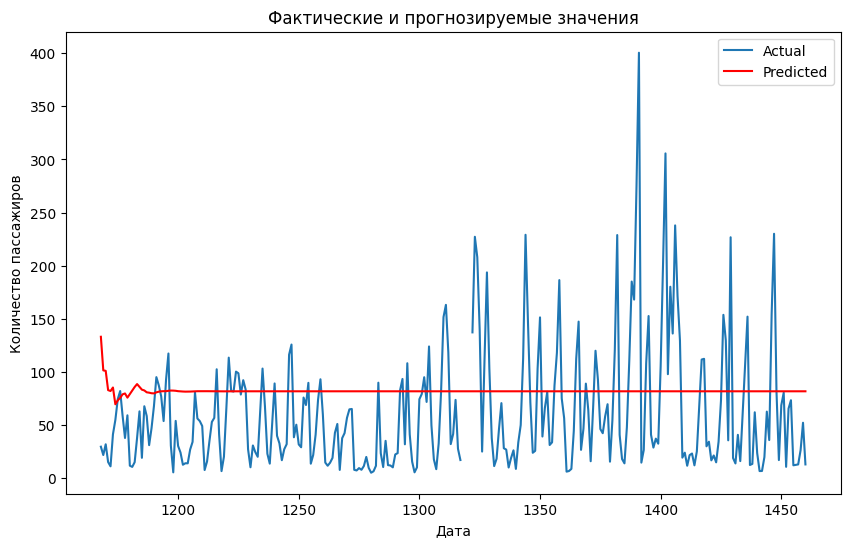

In [81]:
# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Определяем модель SARIMA
model = SARIMAX(df_pm["PM2.5"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Подгонка модели
model_fit = model.fit(disp=False)

# Выведите итоговое значение модели
print(model_fit.summary())

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -7818.667
Date:                            Thu, 17 Apr 2025   AIC                          15647.335
Time:                                    16:38:02   BIC                          15673.724
Sample:                                         0   HQIC                         15657.183
                                           - 1461                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5459      0.012     43.854      0.000       0.521       0.570
ma.L1         -0.9995      0.025   

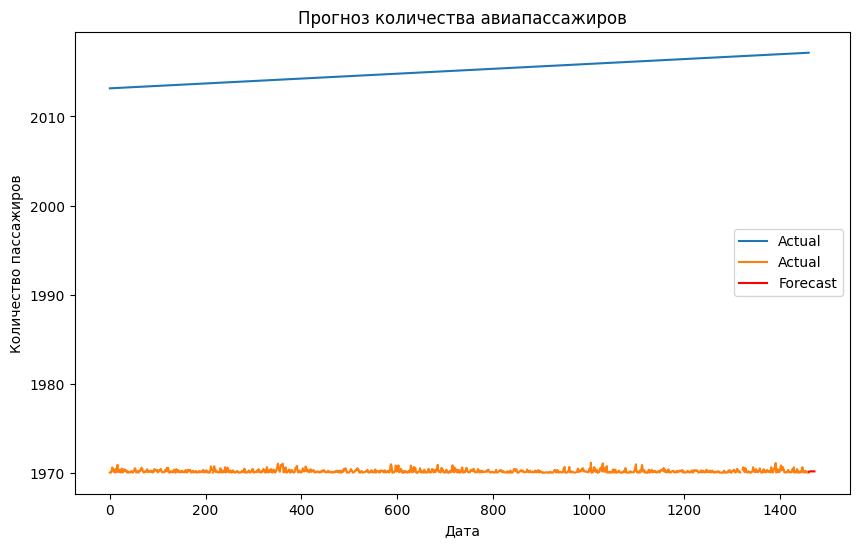

In [57]:
# Сделать прогнозы
forecast = model_fit.forecast(steps=12)

# Постройте график результатов
plt.figure(figsize=(10, 6))
plt.plot(df_pm, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Прогноз количества авиапассажиров')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [74]:
print(df_pm.shape)  # Выведет количество строк и столбцов
print(df_pm.columns)  # Выведет имена столбцов

(1461, 2)
Index(['ds', 'y'], dtype='object')


In [73]:
df_pm = df_pm[['ds', 'y']]

In [75]:
from prophet import Prophet

# df_pm.reset_index(inplace=True)
df_pm.columns = ['ds', 'y'] # Prophet требует, чтобы столбцы были названы 'ds'(дата) и 'y' (значение).
# Создаем экземпляр Prophet
model = Prophet()
# Подгонка модели к данным
model.fit(df_pm)

16:46:20 - cmdstanpy - INFO - Chain [1] start processing
16:46:20 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
# Создаем фрейм данных для хранения прогнозов
future = model.make_future_dataframe(periods=12, freq='ME') # Прогнозирование на 12 месяцев вперед
# Делаем прогнозы
forecast = model.predict(future)


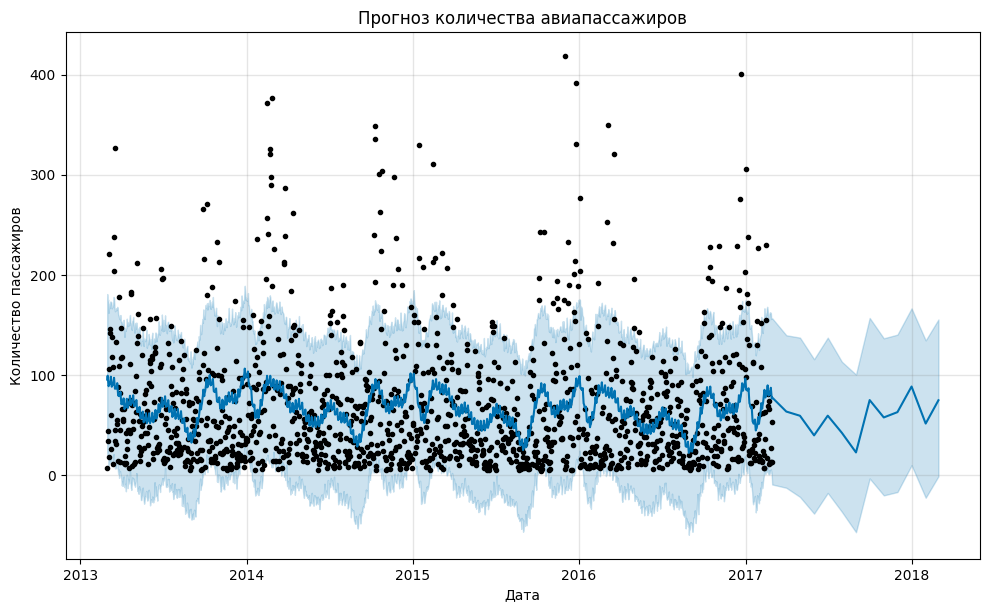

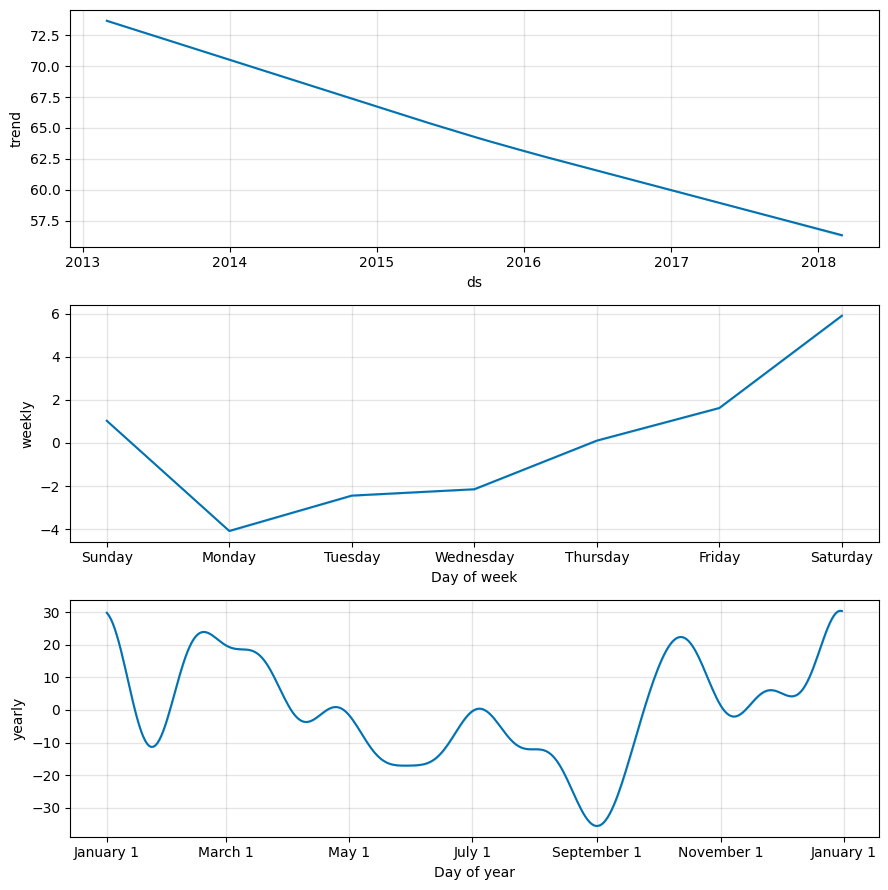

In [78]:
# Построить график прогноза
fig1 = model.plot(forecast)
plt.title('Прогноз количества авиапассажиров')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.show()
# Построить график компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()